Тетрадка предназначена для студентов образвательного проекта Booster MDS использование вне проекта запрещено.

##### Задания не несут смысловой нагрузки для реальной жизни, они сделаны лишь для того, чтоб научить использовать Pandas

#### Каждое задание оценивает в 1 балл, для успешной сдачи задания нужно набрать 12 баллов

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 1.

https://www.kaggle.com/ronitf/heart-disease-uci

___

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('heart_pandas.csv')

In [226]:
data.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


#### Описание признаков

**age**: The person's age in years

**sex**: The person's sex (1 = male, 0 = female)

**cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

**trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)

**chol**: The person's cholesterol measurement in mg/dl

**fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

**thalach**: The person's maximum heart rate achieved

**exang**: Exercise induced angina (1 = yes; 0 = no)

**oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

**slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

**ca**: The number of major vessels (0-3)

**thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

**target**: Heart disease (0 = no, 1 = yes)

> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

___

**Сколько мужчин в датасете? Сколько женщен? (sex) **

In [5]:
## Ваш код
print(len(data[data.sex == 'male']))
print(len(data) - len(data[data.sex == 'male']))

207
96


## Ваш ответ:
Мужчин - 207;

Женщен - 96;

 **Какой процент мужчин в датасете? (решите в одну строчку, не используя предыдущий результат. Не забудте знак процента) **

In [16]:
## Ваш код
'%.2f' %(len(data[data.sex == 'male'])/len(data)) + '%'

'0.68%'

## Ваш ответ:
Процент мужчин в датасете = 0.68%

**Сколько мужчин имеют заболевание сердца? Сколько женщин имеют заболевание сердца? **

In [21]:
## Ваш код
print(len(data[(data.sex == 'male')&(data.target == 1)]))
print(len(data[(data.sex = 'male')&(data.target == 1)]))

93
72


## Ваш ответ:
93 мужчины имеют заболевание сердца

72 женщины имеют заболевание сердца

**Какую долю, от общего числа пациентов, занимают мужчины не имеющие болезнь сердца?**

In [24]:
## Ваш код
'%.2f' %(len(data[(data.sex == 'male')&(data.target == 1)])/len(data))

'0.31'

## Ваш ответ:
Мужчины не имеющие болезнь сердца занимают 0.31% от общего числа пациентов.

**Сколько лет самому молодому пациенту, страдающему болезнью сердца?**

In [32]:
## Ваш код
data[data.target == 1].age.min()

29

## Ваш ответ:
Cамому молодому пациенту, страдающему болезнью сердца 29 лет.

**Сколько лет самому возастному пациенту, у которого нет проблем с сердцем?**

In [33]:
## Ваш код
data[data.target != 1].age.max()

77

## Ваш ответ:
Cамому возастному пациенту, у которого нет проблем с сердцем 77 лет.

**Сколько лет самой молодой женщине, которая страдает болезнью сердца?**

In [36]:
## Ваш код
data[(data.sex != 'male')&(data.target == 1)].age.min()

34

## Ваш ответ:
Возрост самой молодой женщине, которая страдает болезнью сердца равен: 34 года

**Какой средний возраст женщин?**

In [40]:
## Ваш код
'%.0f' %data[data.sex != 'male'].age.mean()

'56'

## Ваш ответ:
Средний возраст женщин: 56 лет

**Каковы средние значения и среднеквадратичные отклонения возраста тех, кто страдают болезнью сердца?**

In [46]:
## Ваш код
print('%.0f' %data[data.target == 1].age.mean())
print('%.1f' %data[data.target == 1].age.std())

52
9.6


## Ваш ответ:
Средние значения возраста тех, кто страдают болезнью сердца: 52 года

Среднеквадратичные отклонения возраста тех, кто страдают болезнью сердца: 9.6 лет

** Правда ли, что люди не болеющие болезнью сердца имеют уровня холестерина меньше среднего? (chol) **

Уровня холестерина:                   246
Уровня холестерина среди не болеющих: 251


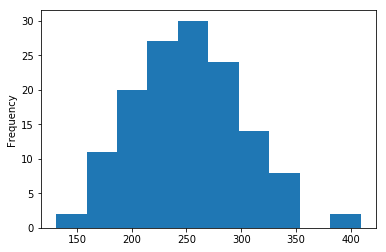

In [254]:
## Ваш код
print('Уровня холестерина:                   %.0f'
      %data.cholesterol.mean())
print('Уровня холестерина среди не болеющих: %.0f' 
      %data[data.target != 1].cholesterol.mean())
data[data.target != 1].cholesterol.plot(kind="hist")

Уровня холестерина среди болеющих: 242


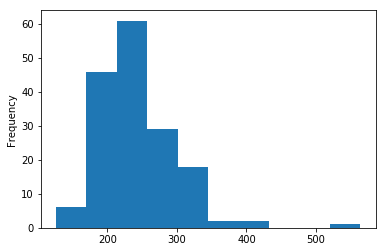

In [255]:
print('Уровня холестерина среди болеющих: %.0f'
      %data[data.target == 1].cholesterol.mean())
data[data.target == 1].cholesterol.plot(kind="hist")

## Ваш ответ:
Не правда! 

Верное утверждение, что люди болеющие болезнью сердца имеют уровня холестерина меньше среднего.

**Выведите статистику rest_ecg для все числовых признаков, его максимально и среднее значение (используйте groupby(), решите в одну строчку)**

In [194]:
## Ваш код
data.groupby('rest_ecg').agg(['max','mean']).T

rest_ecg                      ST-T wave abnormality  \
age                     max               71.000000   
                        mean              52.914474   
resting_blood_pressure  max              180.000000   
                        mean             129.065789   
cholesterol             max              354.000000   
                        mean             237.269737   
max_heart_rate_achieved max              194.000000   
                        mean             151.960526   
st_depression           max                5.600000   
                        mean               0.879605   
num_major_vessels       max                4.000000   
                        mean               0.638158   
target                  max                1.000000   
                        mean               0.631579   

rest_ecg                      left ventricular hypertrophy      normal  
age                     max                         76.000   77.000000  
                        mean                        61.000   55.687075  
resting_blood_pressure  max                        180.000  200.000000  
                        mean                       140.500  134.027211  
cholesterol             max                        327.000  564.000000  
                        mean                       261.750  255.142857  
max_heart_rate_achieved max                        140.000  202.000000  
                        mean                       125.750  147.904762  
st_depression           max                          4.400    6.200000  
                        mean                         2.725    1.159184  
num_major_vessels       max                          3.000    4.000000  
                        mean                         1.000    0.816327  
target                  max                          1.000    1.000000  
                        mean                         0.250    0.462585

## Ваш ответ:
data.groupby('rest_ecg').agg(['max','mean']).T

**Посчитайте у кого уровень депрессии при физический нагрузке выше (в среднем), среди мужчин страдающих болезнью сердца или среди женщин не страдающих болезнью сердца (st_depression)**

In [261]:
## Ваш код
print('Показания уровеня депрессии среди мужчин страдающих болезнью сердца:',
      '   %.2f' %data[(data.sex == 'male')&(data.target == 1)].
      st_depression.mean())
print('Показания уровеня депрессии среди женщин не страдающих болезнью сердца',
      ':%.2f' %data[(data.sex != 'male')&(data.target != 1)].
      st_depression.mean())

Показания уровеня депрессии среди мужчин страдающих болезнью сердца:    0.61
Показания уровеня депрессии среди женщин не страдающих болезнью сердца :1.84


## Ваш ответ:
Уровень депрессии при физический нагрузке выше (в среднем), среди женщин не страдающих болезнью сердца.

**Посчтитайте максимальный и минимальный уровень холестерина для каждого типа chest_pain_type, rest_ecg, thalassemia. Пишите код оптимально, можно использовать циклы**

In [222]:
## Ваш код
for_list = ['chest_pain_type','rest_ecg','thalassemia']
for i in for_list:
    print('-----'*10)
    print(data.groupby(i)['cholesterol'].agg(['max','min']))

--------------------------------------------------
                  max  min
chest_pain_type           
atypical angina   564  126
non-anginal pain  298  182
typical angina    409  131
--------------------------------------------------
                              max  min
rest_ecg                              
ST-T wave abnormality         354  126
left ventricular hypertrophy  327  197
normal                        564  149
--------------------------------------------------
                   max  min
thalassemia                
fixed defect       417  141
normal             318  169
reversable defect  564  126


In [ ]:
## Ваш ответ:

**Сколько значений может принимать каждый из категориальных признаков?**

In [265]:
## Ваш код
columns_list = ['sex','chest_pain_type','fasting_blood_sugar','rest_ecg',
                'exercise_induced_angina','st_slope','thalassemia',
                'num_major_vessels','target']
for i in columns_list:
    print(i, len(data[i].value_counts()))

sex 2
chest_pain_type 3
fasting_blood_sugar 2
rest_ecg 3
exercise_induced_angina 2
st_slope 2
thalassemia 3
num_major_vessels 5
target 2


## Ваш ответ:
Показывате сколько значений может принимать каждый из категориальных признаков:

sex:-----------------------------------2

chest_pain_type:------------------3

fasting_blood_sugar:-------------2

rest_ecg:-----------------------------3

exercise_induced_angina:------2

st_slope:-----------------------------2

thalassemia:------------------------3

num_major_vessels:--------------5

target:---------------------------------2


**У какого категориального признака наблюдается самый сильный дизбаланс классов?**

In [264]:
## Ваш код
columns_list = ['sex','chest_pain_type','fasting_blood_sugar','rest_ecg',
                'exercise_induced_angina','st_slope','thalassemia',
                'num_major_vessels','target']
for i in columns_list:
    print(i,'\n'+ str(data[i].value_counts()),'\n')

sex 
male      207
female     96
Name: sex, dtype: int64 

chest_pain_type 
typical angina      193
atypical angina      87
non-anginal pain     23
Name: chest_pain_type, dtype: int64 

fasting_blood_sugar 
lower than 120mg/ml      258
greater than 120mg/ml     45
Name: fasting_blood_sugar, dtype: int64 

rest_ecg 
ST-T wave abnormality           152
normal                          147
left ventricular hypertrophy      4
Name: rest_ecg, dtype: int64 

exercise_induced_angina 
no     204
yes     99
Name: exercise_induced_angina, dtype: int64 

st_slope 
upsloping    161
flat         142
Name: st_slope, dtype: int64 

thalassemia 
fixed defect         166
reversable defect    117
normal                20
Name: thalassemia, dtype: int64 

num_major_vessels 
0    175
1     65
2     38
3     20
4      5
Name: num_major_vessels, dtype: int64 

target 
1    165
0    138
Name: target, dtype: int64 



## Ваш ответ:
Самый сильный дизбаланс классов среди 2-х значений fasting_blood_sugar

Самый сильный дизбаланс классов среди 3-х значений rest_ecg (left ventricular hypertrophy      4)

---